# Molten-Cores

#### Team Members: Arrisa, Evan, Maulika, Rafail, Sophia

![img_happy](https://www.georgetownbehavioral.com/sites/default/files/georgetown-suicide-awareness.jpg)



## Overview of Project: 

- The Suicide Prevention Index uses data from the ForeverAlone dataset to effectively predict suicidal behaviors and thoughts based on gender, age, race, etc. 
- With this product, you are able to easily learn the key factors that contribute to suicide risk. Having this information on hand can help you recognize the signs of someone who is at risk of attempting suicide so that you can work to help prevent it before it becomes serious. 
- Prediction and an understanding of the causes of suicide is the most important factor for suicide prevention and treatment. The Suicide Prevention Index can help you save lives.



## Importing Libraries



In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import seaborn as sns
import sklearn
import xgboost as xgb

# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import svm
from sklearn.datasets import load_boston
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

suicide_risk = pd.read_csv("foreveralone.csv")

# EDA plots:



## Correlation Plot:



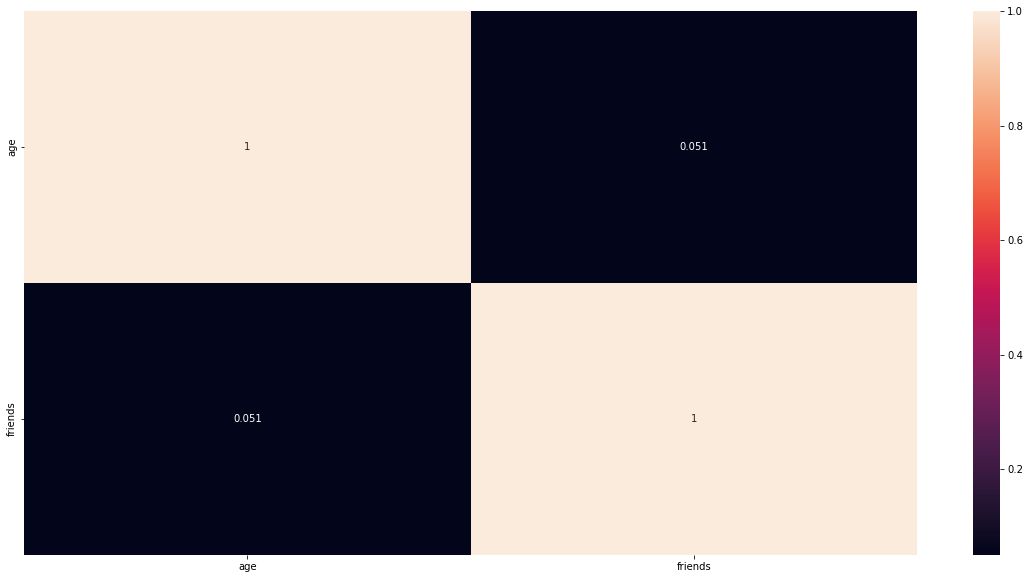

In [81]:
# Correlation Plot

plt.figure(figsize=(20,10))

mat = suicide_risk.corr()

sns.heatmap(mat, annot=True)
plt.show()

## Violin Plot:



{'bodies': [<matplotlib.collections.PolyCollection at 0x7fb21713d700>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fb2170c4f70>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fb21713dcd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fb2171a2c10>}

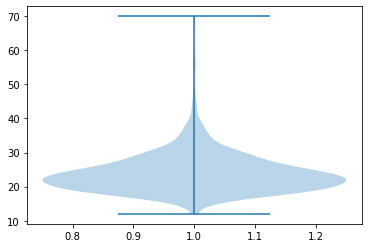

In [82]:
# Violin Plot for Age

plt.violinplot(suicide_risk['age'])

In [83]:
figs = px.violin(suicide_risk, y='age')
figs.show()

In [84]:
figs.write_html("Age.html")

## Box Plot:



Text(0.5, 1.0, 'Box Plot for Age')

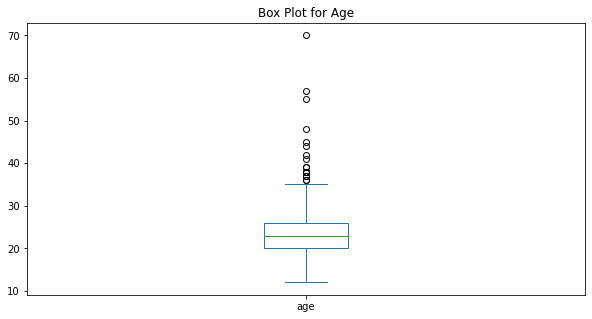

In [85]:
# Box Plot

plt.figure(figsize=(10,5))
suicide_risk['age'].plot(kind='box')
plt.title('Box Plot for Age')

## Density Plots:



TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

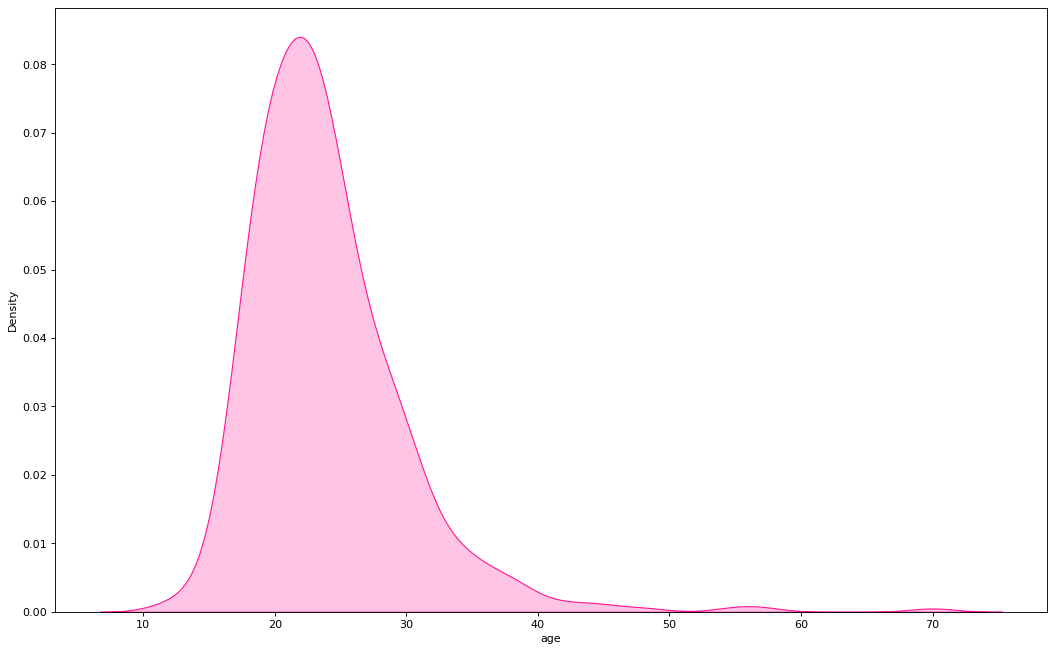

In [86]:
# Density Plot

plt.figure(figsize = (16,10), dpi = 80)
sns.kdeplot(suicide_risk['age'], color="deeppink", shade = True, label = 'Age')
sns.kdeplot(suicide_risk['income'], color="blueviolet", shade = True, label = 'Income')

plt.title('Density plot for Age and Income', fontsize = 22)
plt.legend()
plt.show()

In [0]:
plt.figure(figsize=(30,10))
fig = sns.histplot(x= 'age', y='bodyweight', data = suicide_risk, discrete = True,
             color = 'red', edgecolor = 'black',
             kde = True, kde_kws ={'cut': 2}, line_kws = {'linewidth': 4})
plt.title('Age vs Bodyweight', size = 22)
plt.xlabel('Age', size = 16)
plt.ylabel('Bodyweight', size = 16)
plt.show()

In [0]:
sns.displot(suicide_risk, x="age", y="income", log_scale=(True, False))

## Bar Charts:



In [0]:
# Age vs Income bar chart

plt.figure(figsize=(30,10))
plt.bar('age', 'income', data = suicide_risk)
plt.title('Age Vs Income', size = 20)
plt.xlabel('Age', size = 16)
plt.ylabel('Income', size = 16)
plt.show()

In [0]:
# Number of friends and social fear barchart

plt.figure(figsize = (30,10))
plt.bar('friends', 'social_fear', data = suicide_risk, color = 'orange')
plt.title('Friends vs Social Fear', size = 18)
plt.xlabel('Friends', size = 16)
plt.ylabel('Social Fear', fontsize = 22)
plt.show()

In [0]:
#  Virginity and number of friends barchart

plt.figure(figsize=(15,10))
plt.bar('virgin', 'friends', data = suicide_risk, color = 'violet')
plt.title('Virginity Vs Friends', size = 20)
plt.xlabel('Virginity', size = 16)
plt.ylabel('Friends', size = 16)
plt.show()

In [0]:
figs = px.bar(suicide_risk, x='friends', y='virgin')
figs.show()

In [0]:
figs.write_html("VirginityVsFriends.html")

In [0]:
#  Bodyweight and gender barchart

plt.figure(figsize=(10,10))
plt.bar('gender', 'bodyweight', data = suicide_risk, color = 'turquoise')
plt.title('Bodyweight Vs Gender', size = 20)
plt.xlabel('Bodyweight', size = 16)
plt.ylabel('Gender', size = 16)
plt.show()

# Data Cleaning



In [91]:
asuicide_risk = suicide_risk.dropna()
suicide_risk.isna().sum()

time                      0
gender                    0
sexuallity                0
age                       0
income                    0
race                      0
bodyweight                0
virgin                    0
prostitution_legal        0
pay_for_sex               0
friends                   0
social_fear               0
depressed                 0
what_help_from_others     0
attempt_suicide           0
employment                0
job_title                12
edu_level                 0
improve_yourself_how      0
dtype: int64

In [136]:
#LMAO GOOD LUCK ! - XGBOOST

#I don't need luck for where I'm cleaning ! - Certified Data Janitor


columns_to_drop = ["time"]
suicide_risk.drop(columns_to_drop, axis=1, inplace=True)

race_freq = (suicide_risk['race'].value_counts())/suicide_risk.shape[0]
less_freq_race = race_freq[race_freq<=0.04]
suicide_risk.loc[suicide_risk['race'].isin(less_freq_race.index.tolist()), "race"] = "other"
suicide_risk["race"].value_counts()

paysex_freq = (suicide_risk['pay_for_sex'].value_counts())/suicide_risk.shape[0]
less_freq_paysex = paysex_freq[paysex_freq<=0.3]
suicide_risk.loc[suicide_risk['pay_for_sex'].isin(less_freq_paysex.index.tolist()), "pay_for_sex"] = "Yes"
suicide_risk["pay_for_sex"].value_counts()

sxlty_freq = (suicide_risk['sexuallity'].value_counts())/suicide_risk.shape[0]
less_freq_sxlty = sxlty_freq[sxlty_freq<=0.1]
suicide_risk.loc[suicide_risk['sexuallity'].isin(less_freq_sxlty.index.tolist()), "sexuallity"] = "Bi/Gay/Lesbian"
suicide_risk["sexuallity"].value_counts()

help_freq = (suicide_risk['what_help_from_others'].value_counts())/suicide_risk.shape[0]
less_freq_help = help_freq[help_freq<=0.15]
suicide_risk.loc[suicide_risk['what_help_from_others'].isin(less_freq_help.index.tolist()), "what_help_from_others"] = "Some form of help"
suicide_risk["what_help_from_others"].value_counts()

suicide_risk = suicide_risk.replace({'employment':  {'A homemaker': "Employed", 'Retired': "Unemployed", 'Military': "Employed", 'Unable to work': "Unemployed", 'Self-employed': "Employed", 'Out of work and looking for work': "Unemployed", 'Out of work but not currently looking for work': "Unemployed", 'Employed for wages': "Employed", 'A student': "Student"}})

suicide_risk.loc[suicide_risk['gender'].isin(["Transgender female"]),"gender"] = "Female"
suicide_risk.loc[suicide_risk['gender'].isin(["Transgender male"]),"gender"] = "Male"

suicide_risk =suicide_risk.astype({"improve_yourself_how": str})

suicide_risk.loc[suicide_risk.improve_yourself_how.str.contains("Therapy"), "improve_yourself_how"] = "Therapy"
suicide_risk.loc[suicide_risk.improve_yourself_how.str.contains("gym"), "improve_yourself_how"] = "Go to/join a gym"

improve_freq = (suicide_risk['improve_yourself_how'].value_counts())/suicide_risk.shape[0]
less_freq_improve = improve_freq[improve_freq<=0.2]
suicide_risk.loc[suicide_risk['improve_yourself_how'].isin(less_freq_improve.index.tolist()), "improve_yourself_how"] = "Other"
suicide_risk["improve_yourself_how"].value_counts()

Therapy             130
Go to/join a gym    124
Other               109
None                106
Name: improve_yourself_how, dtype: int64

# Label Encoding



In [93]:
suicide_risk_numeric = suicide_risk.select_dtypes(exclude=np.number).columns

In [94]:
suicide_risk[suicide_risk_numeric].head()

,gender,sexuallity,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,Male,Straight,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,Yes,Yes,Some form of help,Yes,Employed,mechanical drafter,Associate degree,None
1,Male,Bi/Gay/Lesbian,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,Yes,Yes,Some form of help,No,Unemployed,-,"Some college, no degree",Other
2,Male,Straight,$0,White non-Hispanic,Overweight,Yes,No,No,Yes,Yes,I don't want help,No,Unemployed,unemployed,"Some college, no degree",Other
3,Male,Straight,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,Yes,Yes,Some form of help,No,Student,student,"Some college, no degree",Go to/join a gym
4,Male,Straight,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes,No,Yes,I don't want help,No,Employed,Factory worker,"High school graduate, diploma or the equivalen...",None


In [95]:
suicide_risk_numeric

Index(['gender', 'sexuallity', 'income', 'race', 'bodyweight', 'virgin',
       'prostitution_legal', 'pay_for_sex', 'social_fear', 'depressed',
       'what_help_from_others', 'attempt_suicide', 'employment', 'job_title',
       'edu_level', 'improve_yourself_how'],
      dtype='object')

In [96]:
label_encoder = LabelEncoder()
for i in suicide_risk_numeric:
    suicide_risk[i] = label_encoder.fit_transform(suicide_risk[i])
print("Encoded data")
suicide_risk.head()

Encoded data


,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,1,1,35,9,3,0,1,0,0,0.0,1,1,1,1,0,242,0,1
1,1,0,21,1,3,3,1,0,0,0.0,1,1,1,0,2,4,6,2
2,1,1,22,0,3,2,1,0,0,10.0,1,1,0,0,2,271,6,2
3,1,1,19,1,3,2,1,1,0,8.0,1,1,1,0,1,262,6,0
4,1,1,23,9,3,2,0,0,1,10.0,0,1,0,0,0,61,3,1


In [97]:
suicide_risk["attempt_suicide"].value_counts()

0    384
1     85
Name: attempt_suicide, dtype: int64

# Splitting the dataset:

In [98]:
#Target
target = suicide_risk["attempt_suicide"]

input_columns = suicide_risk.loc[:, suicide_risk.columns != "attempt_suicide"]

#Split

smt = SMOTE()
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2, random_state=42)

## Score Bar Graph

Text(0, 0.5, 'Scores')

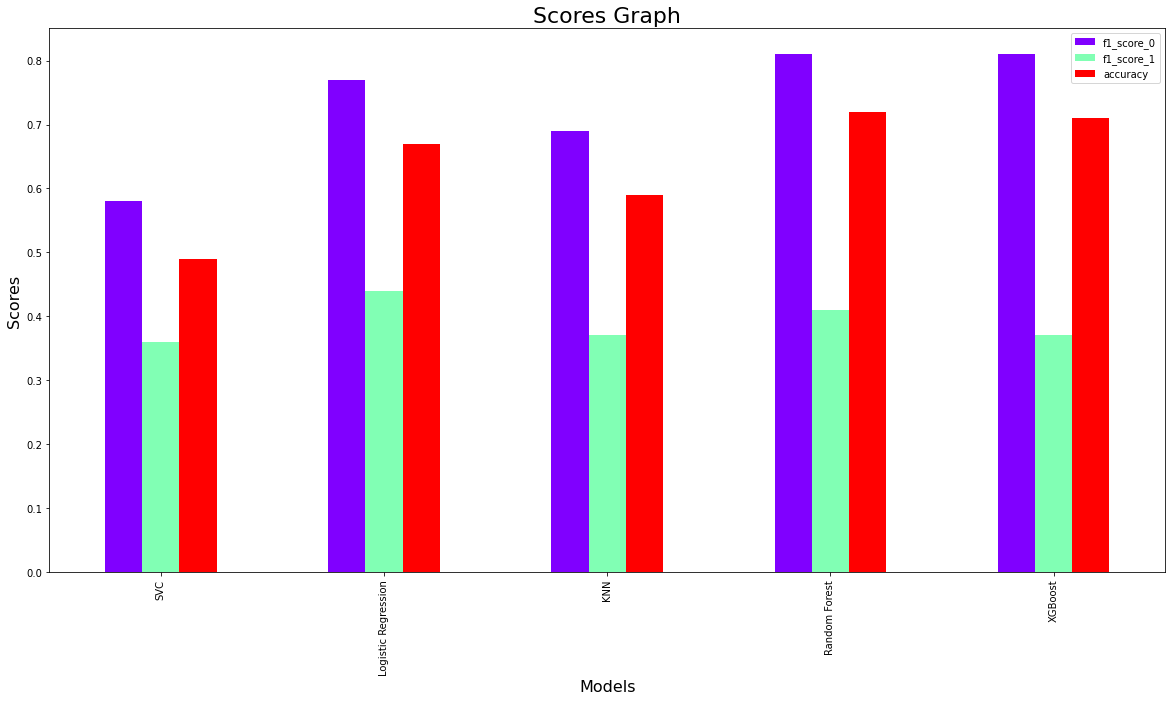

In [150]:
# Scores Bar Graph

# Data to plot
plotdata = pd.DataFrame({
    "f1_score_0":[0.58, 0.77, 0.69, 0.81, 0.81],
    "f1_score_1":[0.36, 0.44, 0.37, 0.41, 0.37],
    "accuracy":[0.49, 0.67, 0.59, 0.72, 0.71]}, 
    index=["SVC", "Logistic Regression", "KNN", "Random Forest", "XGBoost"])

# Plotting
plotdata.plot(kind="bar", figsize = (20,10), colormap = cm.get_cmap('rainbow'))

# Titles
plt.title("Scores Graph", size = 22)
plt.xlabel("Models", size = 16)
plt.ylabel("Scores", size = 16)

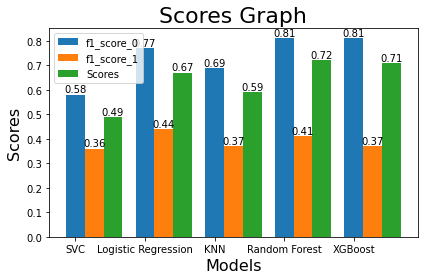

In [172]:
# Scores Bar Graph

# Data to plot
labels = ["SVC", "Logistic Regression", "KNN", "Random Forest", "XGBoost"]
f1_score_0 = [0.58, 0.77, 0.69, 0.81, 0.81]
f1_score_1 = [0.36, 0.44, 0.37, 0.41, 0.37]
accuracy = [0.49, 0.67, 0.59, 0.72, 0.71] 

# the label locations
x = np.arange(len(labels))

# the width of the bars
width = 0.27

# labelling
fig, ax = plt.subplots()
rects1 = ax.bar(x, f1_score_0, width, label='f1_score_0')
rects2 = ax.bar(x + width, f1_score_1, width, label='f1_score_1')
rects3 = ax.bar(x + width*2, accuracy, width, label='Scores')

# titles
ax.set_xlabel('Models', size = 16)
ax.set_ylabel('Scores', size = 16)
ax.set_title('Scores Graph', size = 22)
ax.set_xticks(x, labels)
ax.legend()

# adding values to the top
ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

# layout
fig.tight_layout()

# plot
plt.show()

In [155]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

ax = fig.add_subplot(111)

In [157]:

f1_score_0 = [0.58, 0.77, 0.69, 0.81, 0.81]
rects1 = ax.bar(ind, f1_score_0, width)
f1_score_1 = [0.36, 0.44, 0.37, 0.41, 0.37]
rects2 = ax.bar(ind+width, f1_score_1, width)
accuracy = [0.49, 0.67, 0.59, 0.72, 0.71] 
rects3 = ax.bar(ind+width*2, accuracy, width)

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ("SVC", "Logistic Regression", "KNN", "Random Forest", "XGBoost") )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('f1_score_0', 'f1_score_1', 'accuracy') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (5,).

# Oversampling using SMOTE:

In [102]:
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
print("length of oversampled data is ",len(x_train_sm))

length of oversampled data is  616


In [103]:
y_train_sm.value_counts()

1    308
0    308
Name: attempt_suicide, dtype: int64

In [104]:
y_train.value_counts()

0    308
1     67
Name: attempt_suicide, dtype: int64

# Training The Models:



## SVC



In [105]:
#SVC
my_model = svm.SVC()

In [106]:
#Fit Data
my_model.fit(x_train, y_train)

SVC()

In [107]:
#Predictions
y_hat = my_model.predict(x_test)

In [108]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [109]:
np.array(y_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0])

<AxesSubplot:>

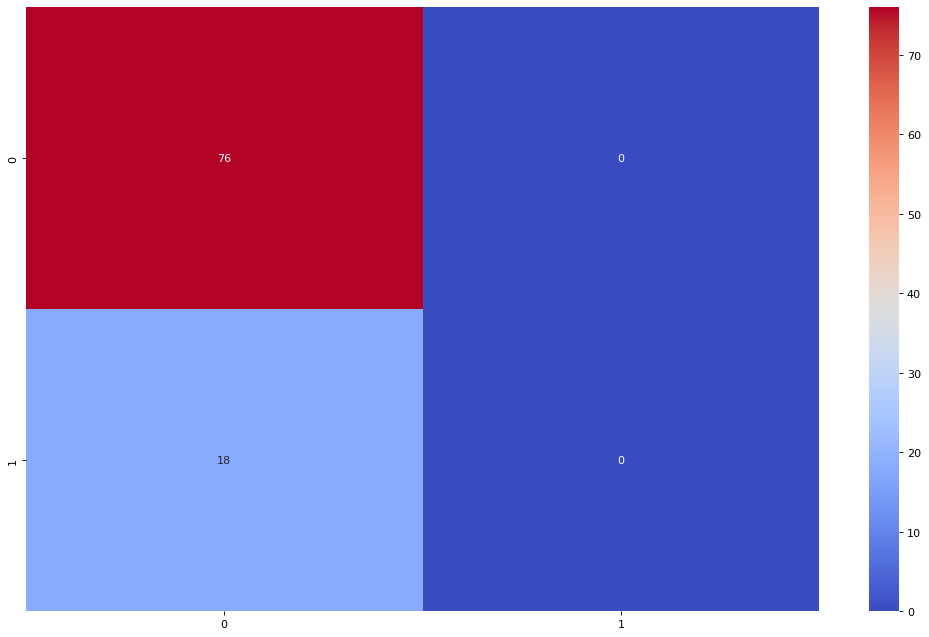

In [110]:
#Confusion Matrix
plt.figure(figsize = (16,10), dpi = 80)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g', cmap = 'coolwarm')

In [111]:
# with SMOTE
my_model.fit(x_train_sm, y_train_sm)

SVC()

In [112]:
#Predictions

y_hat_svc_sm = my_model.predict(x_test)

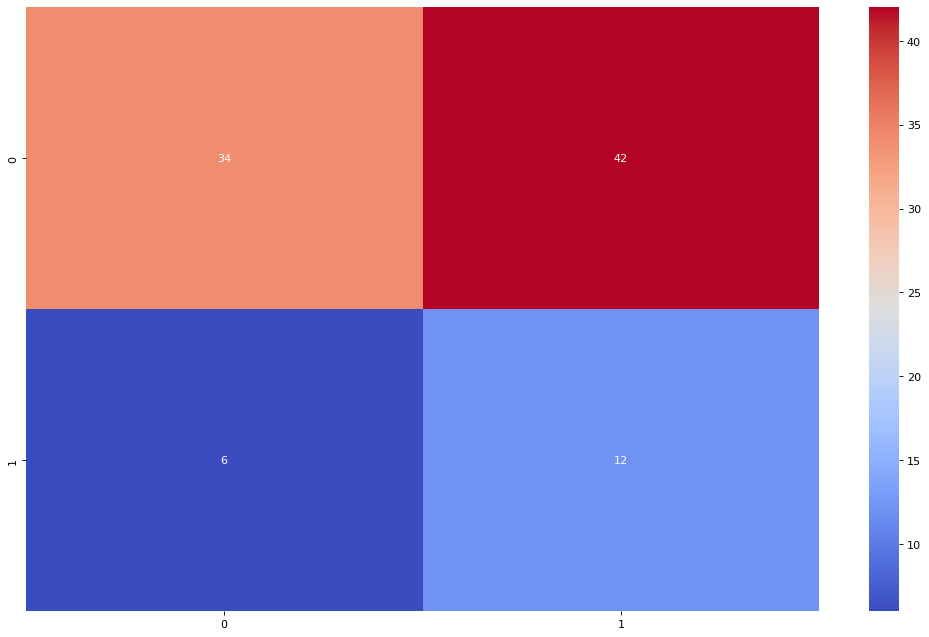

In [113]:
plt.figure(figsize = (16,10), dpi = 80)
fig = sns.heatmap(confusion_matrix(y_test, y_hat_svc_sm), annot=True, fmt='g', cmap = 'coolwarm')

## Classification Report



In [114]:
# y_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        76
           1       0.00      0.00      0.00        18

    accuracy                           0.81        94
   macro avg       0.40      0.50      0.45        94
weighted avg       0.65      0.81      0.72        94



/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [115]:
print(classification_report(y_test, y_hat_svc_sm))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        76
           1       0.22      0.67      0.33        18

    accuracy                           0.49        94
   macro avg       0.54      0.56      0.46        94
weighted avg       0.73      0.49      0.54        94



# Logistic Regression



In [116]:
logreg = LogisticRegression()                         # Step 2
logreg.fit(x_train, y_train)                          # Step 3
y_pred = logreg.predict(x_test)                       # Step 4


logreg.fit(x_train_sm, y_train_sm)
y_pred_logreg_sm = logreg.predict(x_test)

np.array(y_train)


print(classification_report(y_test, y_pred))

print(classification_report(y_test, y_pred_logreg_sm))



              precision    recall  f1-score   support

           0       0.82      0.97      0.89        76
           1       0.50      0.11      0.18        18

    accuracy                           0.81        94
   macro avg       0.66      0.54      0.54        94
weighted avg       0.76      0.81      0.76        94

              precision    recall  f1-score   support

           0       0.86      0.78      0.81        76
           1       0.32      0.44      0.37        18

    accuracy                           0.71        94
   macro avg       0.59      0.61      0.59        94
weighted avg       0.75      0.71      0.73        94



/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

<AxesSubplot:>

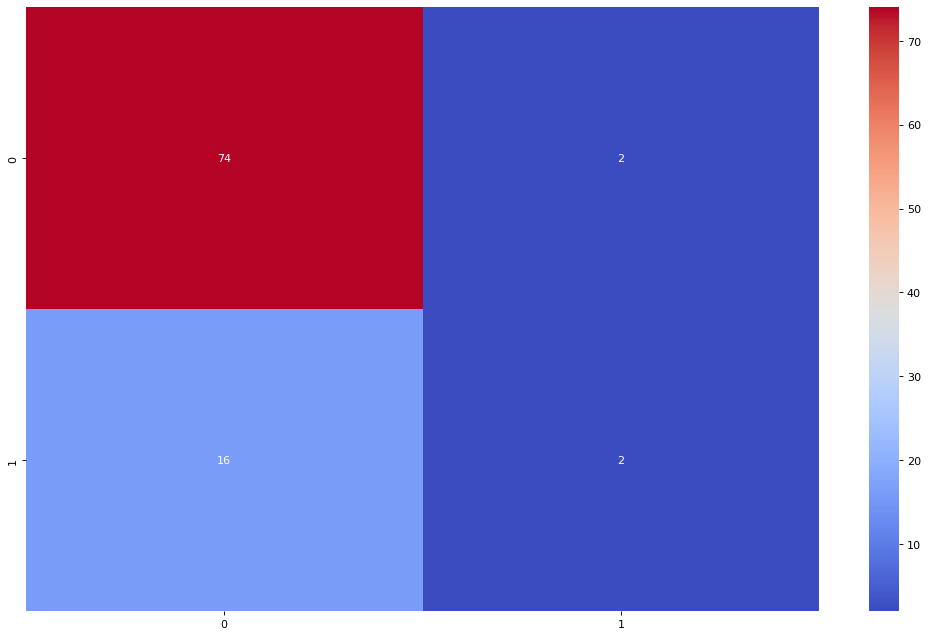

In [117]:
plt.figure(figsize = (16,10), dpi = 80)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap = 'coolwarm')

<AxesSubplot:>

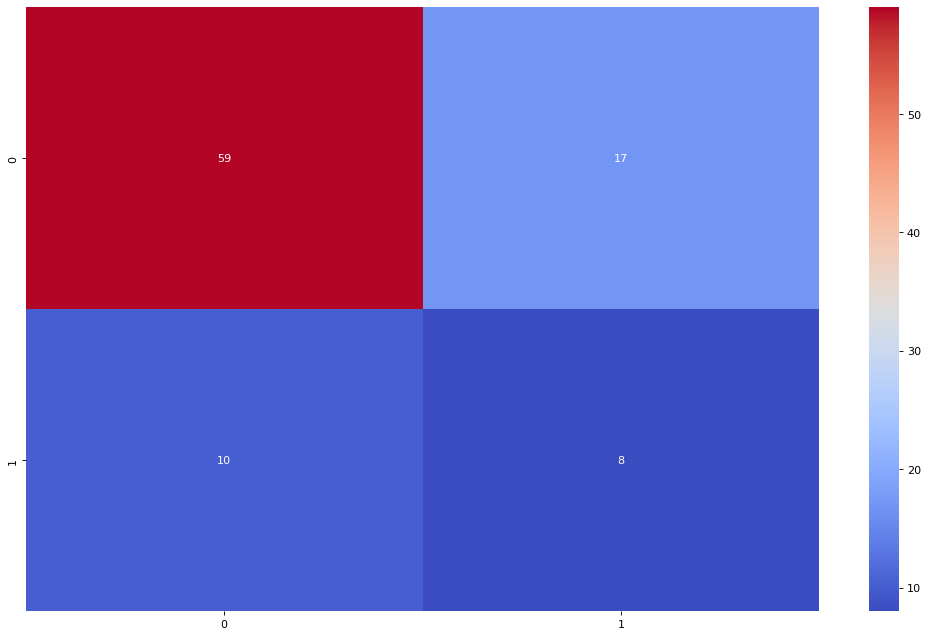

In [118]:
plt.figure(figsize = (16,10), dpi = 80)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_sm), annot=True, fmt='g', cmap = 'coolwarm')

# k-NN



In [119]:
k = 7
suicide_KNN_model = KNN(n_neighbors=7)
suicide_risk.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,1,1,35,9,3,0,1,0,0,0.0,1,1,1,1,0,242,0,1
1,1,0,21,1,3,3,1,0,0,0.0,1,1,1,0,2,4,6,2
2,1,1,22,0,3,2,1,0,0,10.0,1,1,0,0,2,271,6,2
3,1,1,19,1,3,2,1,1,0,8.0,1,1,1,0,1,262,6,0
4,1,1,23,9,3,2,0,0,1,10.0,0,1,0,0,0,61,3,1


In [120]:
suicide_KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [121]:
y_predict = suicide_KNN_model.predict(x_test)

In [122]:
suicide_KNN_model.fit(x_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=7)

In [123]:
y_predict_knn_sm = suicide_KNN_model.predict(x_test)

<AxesSubplot:>

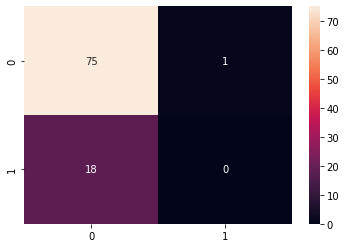

In [124]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g')

In [125]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        76
           1       0.00      0.00      0.00        18

    accuracy                           0.80        94
   macro avg       0.40      0.49      0.44        94
weighted avg       0.65      0.80      0.72        94



<AxesSubplot:>

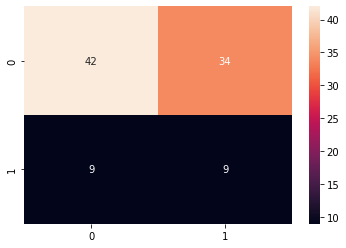

In [126]:
sns.heatmap(confusion_matrix(y_test, y_predict_knn_sm), annot=True, fmt='g')

In [127]:
print(classification_report(y_test, y_predict_knn_sm))

              precision    recall  f1-score   support

           0       0.82      0.55      0.66        76
           1       0.21      0.50      0.30        18

    accuracy                           0.54        94
   macro avg       0.52      0.53      0.48        94
weighted avg       0.71      0.54      0.59        94



# RandomForest



In [128]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80],
#     'max_features': [2],
#     'min_samples_leaf': [3],
#     'min_samples_split': [8],
#     'n_estimators': [100]
# }
# rf = RandomForestClassifier()

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(x_train, y_train)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        76
           1       0.00      0.00      0.00        18

    accuracy                           0.80        94
   macro avg       0.40      0.49      0.44        94
weighted avg       0.65      0.80      0.72        94



<AxesSubplot:>

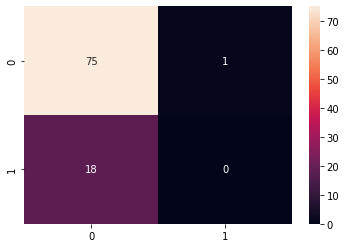

In [129]:
# target = suicide_risk["attempt_suicide"]
# input_columns = suicide_risk.loc[:, suicide_risk.columns != "attempt_suicide"]
# x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

# X = x_train_sm
# y = y_train_sm

rand_model = RandomForestClassifier(bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
rand_model.fit(x_train, y_train)

y_pred = rand_model.predict(x_test)
print(y_pred)
print(np.array(y_test))


print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.38      0.28      0.32        18

    accuracy                           0.78        94
   macro avg       0.61      0.59      0.59        94
weighted avg       0.75      0.78      0.76        94



<AxesSubplot:>

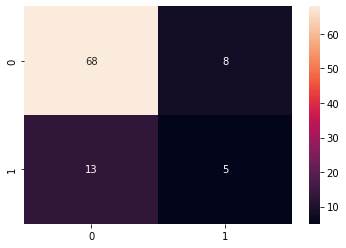

In [142]:
rand_model.fit(x_train_sm, y_train_sm)

y_pred_rand_sm = rand_model.predict(x_test)
print(y_pred_rand_sm)
print(np.array(y_test))


print(classification_report(y_test, y_pred_rand_sm))

sns.heatmap(confusion_matrix(y_test, y_pred_rand_sm), annot=True, fmt='g')

## Pickling the Model

In [143]:
import pickle
rand_model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)

In [144]:
# save the model to disk
filename = 'rf.pkl'
pickle.dump(rand_model, open(filename, 'wb'))

In [145]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_train_sm, y_train_sm)
print(result)

0.9496753246753247


In [148]:
loaded_model.predict(x_train_sm)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

## ONLY FOR XGBOOST FANS



In [0]:
y_train.value_counts()

In [0]:
# x_train_sm_new = x_train_sm.drop("job_title",axis=1)
# x_test_new = x_test.drop("job_title",axis=1)

In [0]:
xg_reg.fit(x_train_sm,y_train_sm)

y_pred_xgboost_sm = xg_reg.predict(x_test)

print(classification_report(y_test, y_pred_xgboost_sm))

sns.heatmap(confusion_matrix(y_test, y_pred_xgboost_sm), annot=True, fmt='g', cmap = 'coolwarm')

In [0]:
suicide_risk['race'].index

In [0]:
suicide_risk['race'].value_counts()


In [0]:

figo = px.pie(values=suicide_risk['race'].value_counts().values, names=suicide_risk['race'].value_counts().index, title='Suicide attempts')
figo.show()

In [0]:
suicide_risk.loc[suicide_risk['income'].isin(["$200,000 or more"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$174,999 to $199,999"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$150,000 to $174,999"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$100,000 to $124,999"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$125,000 to $149,999"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$75,000 to $99,999"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$40,000 to $49,999"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$50,000 to $74,999"]),"income"] = "$20,000 to $29,999"
suicide_risk.loc[suicide_risk['income'].isin(["$30,000 to $39,999"]),"income"] = "$20,000 to $29,999"

In [0]:
figs = px.bar(suicide_risk, x='age', y='income')
figs.show()


In [0]:
import plotly.express as px
figz = px.histogram(suicide_risk, x="age", y="income", color="age",
                   marginal="box",
                   hover_data=suicide_risk.columns)
figz.show()

In [0]:
figo.write_html("PieChart.html")

In [0]:
figz.write_html("DensityPlot.html")

In [0]:
figs.write_html("IncomeVsAge.html")

### DONT TOUCH MY DUMMIES! >:(



In [0]:
# # target dummy

# dummies = pd.get_dummies(suicide_risk["attempt_suicide"])
# suicide_risk["attempt_suicide"] = dummies["Yes"]

# #dummies for prostitution legal

# prostitution_legal_cleaning = pd.get_dummies(suicide_risk["prostitution_legal"])
# suicide_risk = pd.concat([suicide_risk.drop(['prostitution_legal'],axis=1), prostitution_legal_cleaning] , axis=1)
# suicide_risk.rename(columns = {'Yes':'Legal Prostitution', 'No':'Not Legal Prostitution'}, inplace = True)

# #dummies for virgin

# virgin_cleaning = pd.get_dummies(suicide_risk["virgin"])
# suicide_risk = pd.concat([suicide_risk.drop(['virgin'],axis=1), virgin_cleaning] , axis=1)
# suicide_risk.rename(columns = {'Yes':'Virgin', 'No':'Not Virgin'}, inplace = True)

# #dummies for income

# suicide_risk.loc[suicide_risk['income'].isin(["$200,000 or more"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$174,999 to $199,999"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$150,000 to $174,999"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$100,000 to $124,999"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$125,000 to $149,999"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$75,000 to $99,999"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$40,000 to $49,999"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$50,000 to $74,999"]),"income"] = "$20,000 to $29,999"
# suicide_risk.loc[suicide_risk['income'].isin(["$30,000 to $39,999"]),"income"] = "$20,000 to $29,999"

# income_cleaning = pd.get_dummies(suicide_risk["income"])
# suicide_risk = pd.concat([suicide_risk.drop(['income'],axis=1), income_cleaning] , axis=1)

# #dummies for employment

# employment_cleaning = pd.get_dummies(suicide_risk["employment"])
# suicide_risk = pd.concat([suicide_risk.drop(['employment'],axis=1), employment_cleaning] , axis=1)

# #dummies for what help from others	

# what_help_from_others_cleaning = pd.get_dummies(suicide_risk["what_help_from_others"])
# suicide_risk = pd.concat([suicide_risk.drop(['what_help_from_others'],axis=1), what_help_from_others_cleaning] , axis=1)

# #dummmies for improve yourself how

# improve_yourself_how_cleaning = pd.get_dummies(suicide_risk["improve_yourself_how"])
# suicide_risk = pd.concat([suicide_risk.drop(['improve_yourself_how'],axis=1), improve_yourself_how_cleaning] , axis=1)

# suicide_risk.rename(columns = {'Other':'Other improvements', 'None':'Not improved'}, inplace = True)

# #dummies for sexuallity

# sexuallity_cleaning = pd.get_dummies(suicide_risk["sexuallity"])
# suicide_risk = pd.concat([suicide_risk.drop(['sexuallity'],axis=1), sexuallity_cleaning] , axis=1)

# #dummies for gender

# suicide_risk.loc[suicide_risk['gender'].isin(["Transgender female"]),"gender"] = "Female"
# suicide_risk.loc[suicide_risk['gender'].isin(["Transgender male"]),"gender"] = "Male"

# gender_cleaning = pd.get_dummies(suicide_risk["gender"])
# suicide_risk = pd.concat([suicide_risk.drop(['gender'],axis=1), gender_cleaning] , axis=1)

# #dummies for depressed column

# depressed_cleaning = pd.get_dummies(suicide_risk["depressed"])
# suicide_risk = pd.concat([suicide_risk.drop(['depressed'],axis=1), depressed_cleaning] , axis=1)

# suicide_risk.rename(columns = {'Yes':'Depressed', 'No':'Not Depressed'}, inplace = True)

# #dummies for social fear

# social_fear_cleaning = pd.get_dummies(suicide_risk['social_fear'])
# suicide_risk = pd.concat([suicide_risk.drop(['social_fear'], axis = 1), social_fear_cleaning], axis = 1)

# suicide_risk.rename(columns = {'Yes':'Has social fear', 'No':'No Social Fear'}, inplace = True)

# #dummies for payforsex

# suicide_risk.loc[suicide_risk['pay_for_sex'].isin(["Yes but I haven't"]),"pay_for_sex"] = "No"

# pay_for_sex_cleaning = pd.get_dummies(suicide_risk["pay_for_sex"])
# suicide_risk = pd.concat([suicide_risk.drop(['pay_for_sex'],axis=1), pay_for_sex_cleaning] , axis=1)

# suicide_risk.rename(columns = {'Yes':'Yes and I have', 'No': 'No I have not'}, inplace = True)

# #dummies for bodyweight

# suicide_risk.loc[suicide_risk['bodyweight'].isin(["Obese"]),"bodyweight"] = "Overweight"

# bodyweight_cleaning = pd.get_dummies(suicide_risk["bodyweight"])

# suicide_risk = pd.concat([suicide_risk.drop(['bodyweight'],axis=1), bodyweight_cleaning] , axis=1)

# #dummies for race

# race_cleaning = pd.get_dummies(suicide_risk["race"])
# suicide_risk = pd.concat([suicide_risk.drop(['race'],axis=1), race_cleaning] , axis=1)

# suicide_risk_numeric = suicide_risk.select_dtypes(exclude=np.number).colum